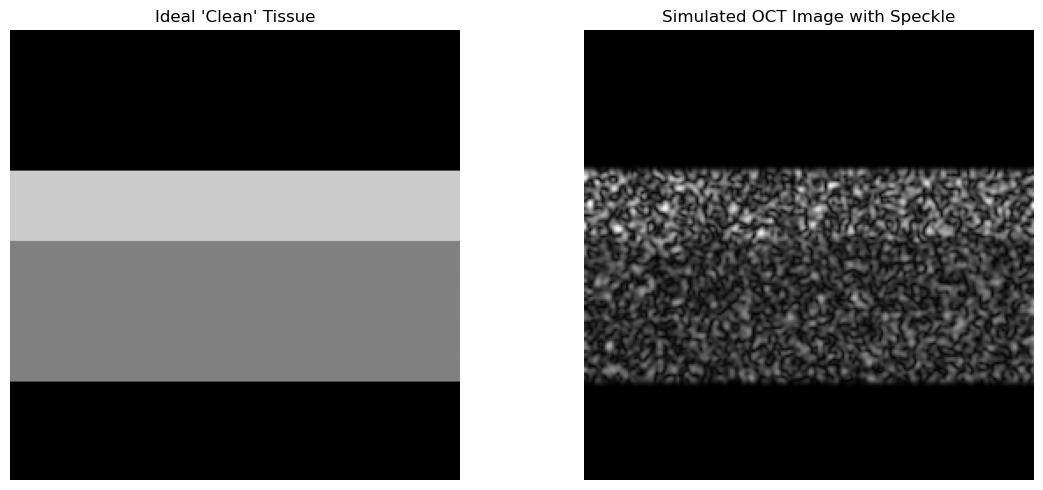

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 1. Create a "Clean" Tissue Phantom
# Two layers of different densities
img_size = 256
clean_tissue = np.zeros((img_size, img_size))
clean_tissue[80:120, :] = 0.8  # Top layer
clean_tissue[120:200, :] = 0.5 # Bottom layer

# 2. Simulate Speckle Noise
# Speckle is the result of complex wave interference
# We represent the 'backscatter' as a complex number (Magnitude * exp(j * Phase))
amplitude = clean_tissue
phase = np.random.uniform(0, 2 * np.pi, amplitude.shape)

# Create the complex interference signal
complex_signal = amplitude * np.exp(1j * phase)

# Real OCT systems have a limited 'resolution' (Point Spread Function)
# We convolve the complex signal with a small kernel to simulate this
psf_size = 1.5
real_part = gaussian_filter(complex_signal.real, sigma=psf_size)
imag_part = gaussian_filter(complex_signal.imag, sigma=psf_size)
oct_intensity = np.sqrt(real_part**2 + imag_part**2)

# 3. Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(clean_tissue, cmap='gray', vmin=0, vmax=1)
plt.title("Ideal 'Clean' Tissue")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(oct_intensity, cmap='gray')
plt.title("Simulated OCT Image with Speckle")
plt.axis('off')

plt.tight_layout()
plt.show()